In [2]:
import polars as pl 
import sys
from pathlib import Path
import importlib
import matplotlib.pyplot as plt
from collections import Counter

# Set the font family to Arial
# https://g.co/gemini/share/3898a74b2d77
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial'] # Add Arial to the sans-serif list

plt.rcParams.update({
    'font.size': 20,
})

REPO_DIR = Path("/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry")
sys.path.append(str(REPO_DIR / "src" / "util"))
sys.path.append(f"{REPO_DIR}/src") 

pl.Config.set_tbl_rows(10) 

polars.config.Config

# Read pre-computed difference of haplotype-specific methylations for all samples 

In [3]:
from read_data import read_dataframe_from_bed

def read_all_samples(bed): 
    df = read_dataframe_from_bed(bed)
    return df

DF_DELTA_METH_ALL_SAMPLES = read_all_samples('delta_meth_all_samples.bed')
print(len(DF_DELTA_METH_ALL_SAMPLES))
DF_DELTA_METH_ALL_SAMPLES.sample(10)

2903221


chrom,start,end,NA12877_num_cpgs,NA12877_num_valid_cpgs,NA12877_num_valid_cpgs_pat,NA12877_num_valid_cpgs_mat,NA12877_count,NA12877_model,NA12878_num_cpgs,NA12878_num_valid_cpgs,NA12878_num_valid_cpgs_pat,NA12878_num_valid_cpgs_mat,NA12878_count,NA12878_model,NA12887_num_cpgs,NA12887_num_valid_cpgs,NA12887_num_valid_cpgs_pat,NA12887_num_valid_cpgs_mat,NA12887_count,NA12887_model,NA12885_num_cpgs,NA12885_num_valid_cpgs,NA12885_num_valid_cpgs_pat,NA12885_num_valid_cpgs_mat,NA12885_count,NA12885_model,NA12883_num_cpgs,NA12883_num_valid_cpgs,NA12883_num_valid_cpgs_pat,NA12883_num_valid_cpgs_mat,NA12883_count,NA12883_model,NA12881_num_cpgs,NA12881_num_valid_cpgs,NA12881_num_valid_cpgs_pat,NA12881_num_valid_cpgs_mat,…,200087_model,200101_num_cpgs,200101_num_valid_cpgs,200101_num_valid_cpgs_pat,200101_num_valid_cpgs_mat,200101_count,200101_model,200102_num_cpgs,200102_num_valid_cpgs,200102_num_valid_cpgs_pat,200102_num_valid_cpgs_mat,200102_count,200102_model,200103_num_cpgs,200103_num_valid_cpgs,200103_num_valid_cpgs_pat,200103_num_valid_cpgs_mat,200103_count,200103_model,200104_num_cpgs,200104_num_valid_cpgs,200104_num_valid_cpgs_pat,200104_num_valid_cpgs_mat,200104_count,200104_model,200105_num_cpgs,200105_num_valid_cpgs,200105_num_valid_cpgs_pat,200105_num_valid_cpgs_mat,200105_count,200105_model,200106_num_cpgs,200106_num_valid_cpgs,200106_num_valid_cpgs_pat,200106_num_valid_cpgs_mat,200106_count,200106_model
str,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,…,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64
"""chr6""",22760000,22761000,4,4,0,0,null,null,4,4,4,4,-0.0565,-0.032,4,4,4,4,0.10425,0.0265,4,4,4,4,-0.04525,-0.01775,4,4,4,4,-0.0945,-0.0225,4,4,4,4,…,-0.00225,4,4,4,4,0.06575,-0.00575,4,4,4,4,-0.05975,-0.10075,4,4,4,4,0.00775,-0.0365,4,4,4,4,0.05475,0.04225,4,4,4,4,0.04075,0.0295,4,4,4,4,0.00025,0.06275
"""chrX""",46951000,46952000,21,21,0,0,null,null,21,21,21,21,0.021429,0.007952,21,21,21,21,-0.02381,-0.069857,21,21,21,21,-0.06219,-0.114,21,21,0,0,null,null,21,21,21,21,…,null,21,21,0,0,null,null,21,21,0,0,null,null,21,21,0,21,null,null,21,21,0,0,null,null,21,21,0,0,null,null,21,21,0,0,null,null
"""chr3""",187124000,187125000,3,3,0,0,null,null,3,3,3,3,-0.039333,0.005667,3,3,3,3,0.031,-0.050333,3,3,3,3,-0.014667,0.016,3,3,3,3,-0.097,-0.006333,3,3,3,3,…,0.017667,3,3,3,3,-0.062333,-0.004333,3,3,3,3,-0.008667,0.01,3,3,3,3,0.132,0.075667,3,3,3,3,-0.012,-0.02,3,3,3,3,0.112667,0.009333,3,3,3,3,0.233667,0.009667
"""chr3""",97718000,97719000,2,2,0,0,null,null,2,2,2,2,0.055,0.036,2,2,2,2,-0.064,-0.0115,2,2,2,2,-0.008,-0.026,2,2,2,2,0.0325,-0.0035,2,2,2,2,…,0.0265,2,2,2,2,-0.0685,-0.0715,2,2,2,2,0.024,-0.026,2,2,2,2,-0.0815,0.029,2,2,2,2,0.1035,-0.08,2,2,2,2,0.1355,0.0625,2,2,2,2,0.0075,0.0465
"""chr7""",132584000,132585000,9,9,9,9,-0.028111,-0.007333,9,9,9,9,0.019333,-0.039,9,9,9,9,-0.105889,-0.054,9,9,9,9,0.000889,0.055778,9,9,9,9,0.000222,0.001111,9,9,9,9,…,null,9,9,0,0,null,null,9,9,9,9,-0.016556,-0.038667,9,9,9,9,-0.035,0.07,9,9,9,9,-0.038333,0.050889,9,9,9,9,0.053222,0.044111,9,9,9,9,0.006,0.066778
"""chr4""",185893000,185894000,13,13,13,13,0.014308,0.025231,13,13,13,13,-0.039615,-0.034308,13,13,13,13,0.032692,0.029769,13,13,13,13,0.043769,0.009538,13,13,13,13,-0.019615,0.012538,13,13,13,13,…,-0.058385,13,13,13,13,0.040231,0.035692,13,13,13,13,-0.012308,0.003692,13,13,13,13,0.031846,0.007154,13,13,13,13,-0.028154,-0.029769,13,13,0,0,null,null,13,13,13,13,-0.035769,-0.018692
"""chr1""",223987000,223988000,11,11,11,11,0.031636,0.004727,11,11,11,11,0.045818,0.031818,11,11,11,11,0.030182,0.052,11,11,11,11,-0.010909,-0.001818,11,11,11,11,-0.014455,-0.029909,11,11,11,11,…,0.056341,11,11,11,11,0.004909,0.003455,11,11,11,11,-0.001091,0.041455,11,11,11,11,-0.043364,-0.02,11,11,11,11,0.013818,0.041364,11,11,11,11,0.024,0.008636,11,11,11,0,null

# Call candidate imprinted loci across all samples using caller developed in imprinting.2.ipynb

In [11]:
import imprinting
importlib.reload(imprinting)
from imprinting import call_imprinted_loci

DF_IMPRINTED_CANDIDATES = call_imprinted_loci(
    DF_DELTA_METH_ALL_SAMPLES, 
    meth_mode='model',
    delta_meth_threshold=0.72, 
    num_valid_cpgs_per_hap_threshold=4,
    valid_cpg_ratio_threshold=0.5
)
DF_IMPRINTED_CANDIDATES.sample(10, seed=42) 

Number of candidate imprinted loci: 343


chrom,start,end,imprinted_samples,num_imprinted_samples,locus
str,i64,i64,list[str],u32,str
"""chrX""",69505000,69506000,"[""200081""]",1,"""chrX:69505000-69506000"""
"""chr9""",62532000,62533000,"[""NA12877""]",1,"""chr9:62532000-62533000"""
"""chrX""",149938000,149939000,"[""200081""]",1,"""chrX:149938000-149939000"""
"""chrX""",48574000,48575000,"[""200081""]",1,"""chrX:48574000-48575000"""
"""chrX""",65667000,65668000,"[""200081""]",1,"""chrX:65667000-65668000"""
"""chr20""",58850000,58851000,"[""200081""]",1,"""chr20:58850000-58851000"""
"""chr3""",196598000,196599000,"[""NA12877""]",1,"""chr3:196598000-196599000"""
"""chr20""",58889000,58890000,"[""NA12877"", ""NA12878"", … ""200105""]",17,"""chr20:58889000-58890000"""
"""chr6""",144008000,144009000,"[""NA12877"", ""NA12878"", … ""200106""]",13,"""chr6:144008000-144009000"""


# Compare candidate imprinted loci with the Jima et al 2022 truth set

In [6]:
def read_truth_set_imprinted_loci(): 
    df = (
        pl
        # https://quinlangroup.slack.com/archives/C0803TM7X0X/p1758742312373849
        # https://www.tandfonline.com/doi/10.1080/15592294.2022.2091815
        .read_csv(
            't0001-10.1080_15592294.2022.2091815.csv', 
            separator=',',
            comment_prefix=None,
            has_header=True,
        )
        .with_columns(
            pl.col("Genomic Coordinates").str.split_exact(":", 1)  # Split by ":" into two parts
            .struct.rename_fields(["chrom", "start-end"])          
            .alias("split_colon")
        )
        .unnest("split_colon")
        .with_columns(
            pl.col("start-end").str.split_exact("-", 1) # Split by "-" into two parts
            .struct.rename_fields(["start", "end"])     
            .alias("split_dash")
        )
        .unnest("split_dash")
        .drop(["start-end", "Genomic Coordinates"])
        .with_columns(
            pl.col("Distance to Nearest Transcript")
            .str.replace_all(",", "")  # Step 1: Remove all commas
            .cast(pl.Int64)            # Step 2: Cast the cleaned string to i64
        )
        .cast({
            "start": pl.Int64,
            "end": pl.Int64,
        })
        .with_columns(
            (pl.col('end') - pl.col('start')).alias('length')
        )
    )

    return df.select(['chrom', 'start', 'end', 'length'] + df.columns[:-4])

DF_IMPRINTED_TRUTH = read_truth_set_imprinted_loci()
DF_IMPRINTED_TRUTH
# ICRs overlapping ENCODE annotated regions of CTCF binding and DNase I hypersensitivity are indicated by * and ^, respectively. 
# ICRs overlapping previously published ICRs of imprinted genes are indicated by #.

chrom,start,end,length,ID,Parental Origin of Methylation,Nearest Transcript,Distance to Nearest Transcript
str,i64,i64,i64,str,str,str,i64
"""chr1""",628959,630792,1833,"""ICR_2^""","""P""","""MTND1P23|MTND2P28""",0
"""chr1""",632183,632834,651,"""ICR_3^""","""P""","""MTCO1P12|MIR12136|MTCO2P12""",0
"""chr1""",633381,634921,1540,"""ICR_4^""","""P""","""MTCO2P12|MTATP8P1|MTATP6P1|MTC…",0
"""chr1""",1174554,1174597,43,"""ICR_6*""","""P""","""TTLL10""",0
"""chr1""",2469095,2469433,338,"""ICR_10^""","""P""","""PLCH2""",0
…,…,…,…,…,…,…,…
"""chrX""",40243438,40244131,693,"""ICR_1413^""","""P""","""BCOR""",66048
"""chrX""",47637837,47638168,331,"""ICR_1417*^""","""M""","""ELK1""",0
"""chrX""",99939597,99940400,803,"""ICR_1441^""","""M""","""B3GNT2P1""",51491


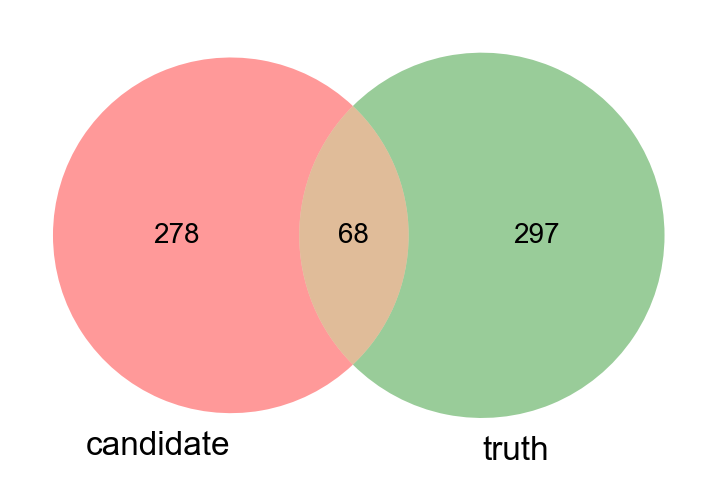

In [13]:
import find_unique_and_common_records
importlib.reload(find_unique_and_common_records)
from find_unique_and_common_records import find_unique_and_common_records_with_venn_diagram 

DF_IMPRINTED_CANDIDATES_UNIQUE, DF_IMPRINTED_TRUTH_UNIQUE, DF_IMPRINTED_COMMON = find_unique_and_common_records_with_venn_diagram(
    DF_IMPRINTED_CANDIDATES, 
    DF_IMPRINTED_TRUTH, 
    min_overlap=100, 
    labels=('candidate', 'truth')
)

### Loci common to candidate and truth sets

In [14]:
# Almost all candidate loci that are found in the truth set are predicted to be methylated on maternal haplotype  
# "Previously reported ICRs that do not have gamete specific methylation are also included and labelled as having Somatic (S) methylation. "
Counter(DF_IMPRINTED_COMMON['Parental Origin of Methylation_2'].to_numpy())

Counter({'M': 60, 'P': 5, 'S': 3})

In [16]:
# Some of these were validated in IGV: 
DF_IMPRINTED_COMMON.sample(10, seed=42)

chrom,start,end,imprinted_samples,num_imprinted_samples,locus,chrom_2,start_2,end_2,length_2,ID_2,Parental Origin of Methylation_2,Nearest Transcript_2,Distance to Nearest Transcript_2,overlap_len,locus_candidate
str,i64,i64,list[str],u32,str,str,i64,i64,i64,str,str,str,i64,i64,str
"""chr19""",56837000,56838000,"[""NA12877"", ""NA12878"", … ""200105""]",13,"""chr19:56837000-56838000""","""chr19""",56837320,56841439,4119,"""ICR_1142*^#""","""M""","""ZIM2|PEG3|MIMT1""",0,680,"""chr19:56837000-56838000"""
"""chr8""",37747000,37748000,"[""NA12881""]",1,"""chr8:37747000-37748000""","""chr8""",37747687,37748265,578,"""ICR_523^""","""M""","""ERLIN2""",0,313,"""chr8:37747000-37748000"""
"""chr20""",58842000,58843000,"[""NA12877"", ""NA12878"", … ""200106""]",18,"""chr20:58842000-58843000""","""chr20""",58839107,58842875,3768,"""ICR_1205*^#""","""M""","""GNAS""",0,875,"""chr20:58842000-58843000"""
"""chr18""",80147000,80148000,"[""NA12877"", ""200101"", … ""200106""]",5,"""chr18:80147000-80148000""","""chr18""",80147168,80147833,665,"""ICR_1052^""","""M""","""ADNP2""",6822,665,"""chr18:80147000-80148000"""
"""chr19""",56838000,56839000,"[""NA12877"", ""NA12878"", … ""200106""]",21,"""chr19:56838000-56839000""","""chr19""",56837320,56841439,4119,"""ICR_1142*^#""","""M""","""ZIM2|PEG3|MIMT1""",0,1000,"""chr19:56838000-56839000"""
"""chr14""",100827000,100828000,"[""200085""]",1,"""chr14:100827000-100828000""","""chr14""",100824556,100828242,3686,"""ICR_873*^#""","""S""","""MEG3""",0,1000,"""chr14:100827000-100828000"""
"""chr6""",144007000,144008000,"[""NA12877"", ""NA12878"", … ""200106""]",14,"""chr6:144007000-144008000""","""chr6""",144006941,144008825,1884,"""ICR_404^#""","""M""","""PLAGL1|HYMAI""",0,1000,"""chr6:144007000-144008000"""
"""chr15""",24956000,24957000,"[""NA12877"", ""NA12878"", … ""200106""]",18,"""chr15:24956000-24957000""","""chr15""",24954592,24956828,2236,"""ICR_893*^""","""M""","""SNHG14|SNRPN|SNURF""",0,828,"""chr15:24956000-24957000"""
"""chr7""",94657000,94658000,"[""NA12877"", ""NA12878"", … ""200106""]",18,"""chr7:94657000-94658000""","""chr7""",94656360,94658647,2287,"""ICR_475*^""","""M""","""PEG10""",0,1000,"""chr7:94657000-94658000"""


### Out of 10 random loci from candidate-unique set, only 1 did not validate in IGV 

In [ ]:
# chr3:77785000-77786000 in 200085 is not real
DF_IMPRINTED_CANDIDATES_UNIQUE.sample(10, seed=42)

chrom,start,end,imprinted_samples,num_imprinted_samples,locus
str,i64,i64,list[str],u32,str
"""chrX""",78106000,78107000,"[""200081""]",1,"""chrX:78106000-78107000"""
"""chr9""",64488000,64489000,"[""NA12879""]",1,"""chr9:64488000-64489000"""
"""chrX""",150569000,150570000,"[""200081""]",1,"""chrX:150569000-150570000"""
"""chrX""",54043000,54044000,"[""200081""]",1,"""chrX:54043000-54044000"""
"""chrX""",75747000,75748000,"[""200081""]",1,"""chrX:75747000-75748000"""
"""chrX""",40156000,40157000,"[""NA12885""]",1,"""chrX:40156000-40157000"""
"""chr3""",77785000,77786000,"[""200085""]",1,"""chr3:77785000-77786000"""
"""chrX""",45769000,45770000,"[""200081""]",1,"""chrX:45769000-45770000"""
"""chr6""",291000,292000,"[""NA12878""]",1,"""chr6:291000-292000"""


### Out of 10 random loci from truth-unique set, none validate in IGV in sample NA12885

In [20]:
DF_IMPRINTED_TRUTH_UNIQUE.sample(10, seed=42)

chrom,start,end,length,ID,Parental Origin of Methylation,Nearest Transcript,Distance to Nearest Transcript,locus
str,i64,i64,i64,str,str,str,i64,str
"""chr17""",1961067,1961305,238,"""ICR_982""","""P""","""RTN4RL1""",0,"""chr17:1961067-1961305"""
"""chr6""",30781799,30782146,347,"""ICR_385^""","""P""","""HCG20""",0,"""chr6:30781799-30782146"""
"""chr22""",48238911,48239473,562,"""ICR_1385*""","""P""","""MIR3201""",34891,"""chr22:48238911-48239473"""
"""chr13""",111411595,111411773,178,"""ICR_836""","""M""","""TEX29""",67347,"""chr13:111411595-111411773"""
"""chr16""",35397156,35398017,861,"""ICR_957""","""P""","""LINC01566""",5443,"""chr16:35397156-35398017"""
"""chr10""",133569810,133570081,271,"""ICR_695""","""M""","""SPRNP1""",0,"""chr10:133569810-133570081"""
"""chr2""",49229257,49229842,585,"""ICR_123^""","""P""","""FSHR""",74730,"""chr2:49229257-49229842"""
"""chr11""",2000487,2001247,760,"""ICR_718*^#""","""P""","""MRPL23|H19""",0,"""chr11:2000487-2001247"""
"""chr4""",2463493,2463856,363,"""ICR_243*^""","""M""","""CFAP99""",530,"""chr4:2463493-2463856"""
